IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT AND LOAD DATASET

attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [3]:
import pandas as pd

# Load train and test datasets
train_path = r"C:\Users\mamid\Downloads\Train_data.csv"
test_path = r"C:\Users\mamid\Downloads\Test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

PREPROCESSING THE DATA

In [4]:
# Print types of values in 'class' column
print("\nTypes of values in 'class' column:")
print(train_df['class'].value_counts())


Types of values in 'class' column:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


VISUALIZING THE DATA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load train and test datasets
train_path = r"C:\Users\mamid\Downloads\Train_data.csv"
test_path = r"C:\Users\mamid\Downloads\Test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display the first few rows of the train dataset
print("Train Dataset:")
print(train_df.head())

# Display the first few rows of the test dataset
print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10             

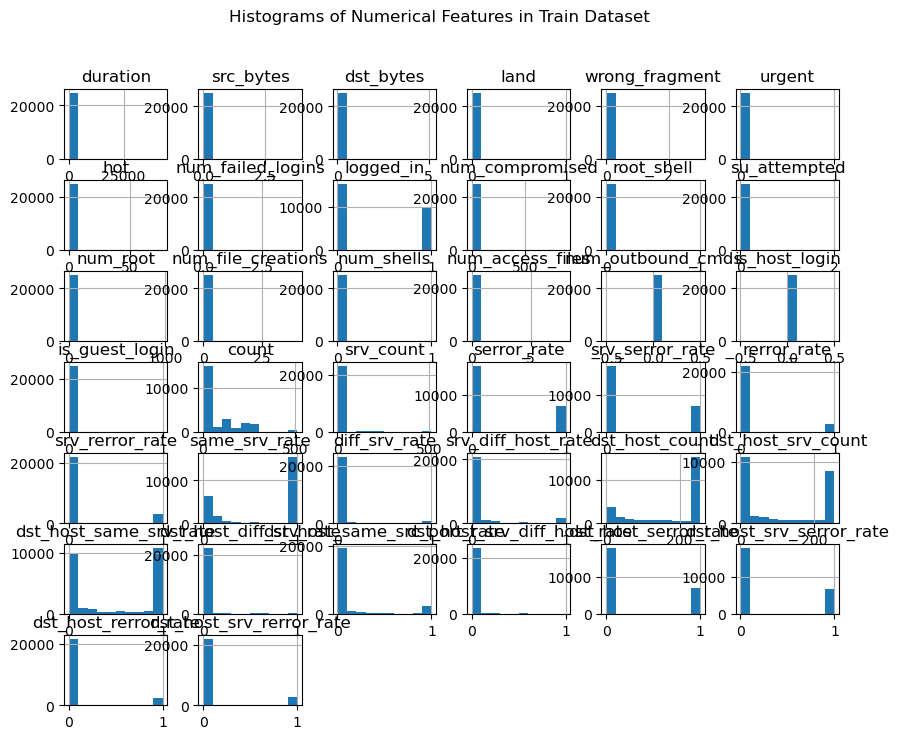

In [6]:
# Plotting histograms for numerical features in the train dataset
train_df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features in Train Dataset")
plt.show()

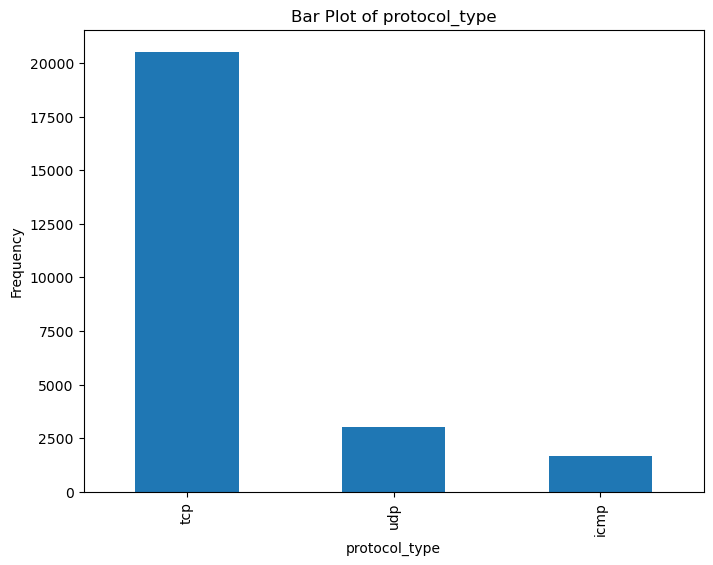

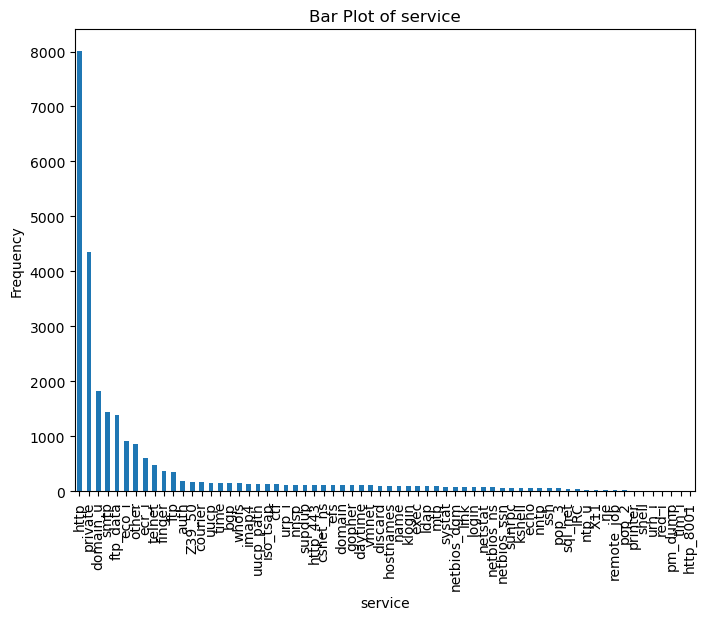

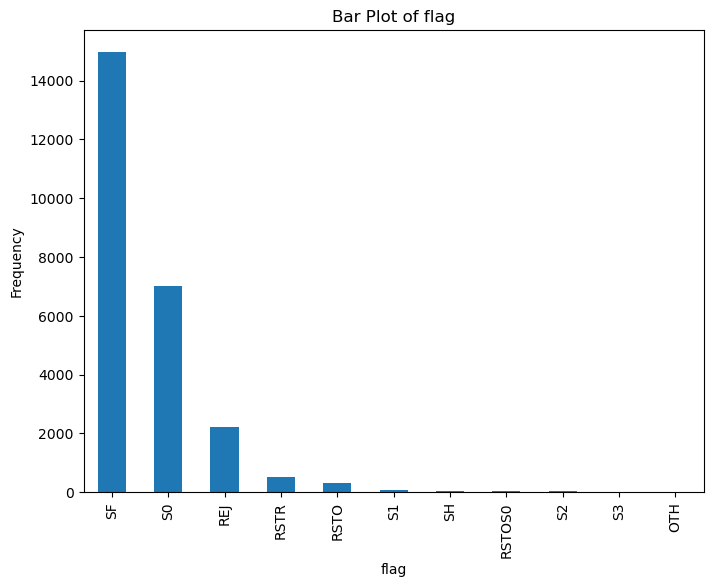

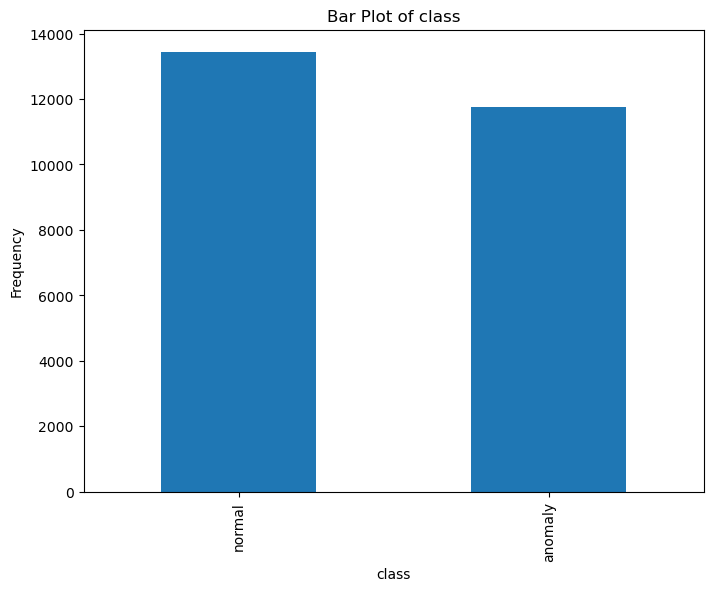

In [7]:

# Plotting a bar plot for categorical features in the train dataset
categorical_cols = train_df.select_dtypes(include='object').columns
for col in categorical_cols:
    train_df[col].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


REMOVING THE HIGHLY CORRELATED COLOUMNS

In [8]:
# List of highly correlated columns to be removed
columns_to_remove = ['num_root', 'srv_serror_rate', 'srv_rerror_rate',
                     'dst_host_srv_serror_rate', 'dst_host_serror_rate',
                     'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
                     'dst_host_same_srv_rate']

# Remove highly correlated columns from train dataset
train_df.drop(columns=columns_to_remove, inplace=True)

# Remove highly correlated columns from test dataset
test_df.drop(columns=columns_to_remove, inplace=True)


In [9]:
# Print columns of the train dataset
print("Columns of the train dataset after removing highly correlated columns:")
print(train_df.columns)

# Print columns of the test dataset
print("\nColumns of the test dataset after removing highly correlated columns:")
print(test_df.columns)

Columns of the train dataset after removing highly correlated columns:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'class'],
      dtype='object')

Columns of the test dataset after removing highly correlated columns:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su

In [10]:
# Print count of columns after removing highly correlated columns
print("Count of columns after removing highly correlated columns:")
print("Train dataset:", len(train_df.columns))
print("Test dataset:", len(test_df.columns))

Count of columns after removing highly correlated columns:
Train dataset: 34
Test dataset: 33


LABEL ENCODING THE FEATURES

In [11]:

from sklearn.preprocessing import LabelEncoder

# Combine train and test datasets for label encoding
combined_df = pd.concat([train_df, test_df], axis=0)

# Convert any numeric values in categorical features to strings
categorical_features = ['protocol_type', 'service', 'flag', 'class']
for feature in categorical_features:
    combined_df[feature] = combined_df[feature].astype(str)

# Perform label encoding for categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    combined_df[feature] = label_encoder.fit_transform(combined_df[feature])

# Split back into train and test datasets
train_df = combined_df.iloc[:len(train_df)]
test_df = combined_df.iloc[len(train_df):]

# Confirm the changes
print("Train dataset after label encoding:")
print(train_df.head())

print("\nTest dataset after label encoding:")
print(test_df.head())


Train dataset after label encoding:
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   
1         0              2       41     9        146          0     0   
2         0              1       46     5          0          0     0   
3         0              1       22     9        232       8153     0   
4         0              1       22     9        199        420     0   

   wrong_fragment  urgent  hot  ...  rerror_rate  same_srv_rate  \
0               0       0    0  ...          0.0           1.00   
1               0       0    0  ...          0.0           0.08   
2               0       0    0  ...          0.0           0.05   
3               0       0    0  ...          0.0           1.00   
4               0       0    0  ...          0.0           1.00   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.00                0.00          

BUILDING AND TRAINING A NEURAL NETWORK

CNN

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Convert features to appropriate format for CNN
X_train = np.array(X_train).reshape(len(X_train), X_train.shape[1], 1)
y_train = to_categorical(y_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Architecture
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Print training accuracy
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Test Accuracy:", test_accuracy)

# Save the model
model.save("cnn_model.h5")


Epoch 1/100


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7930 - loss: 305.4752 - val_accuracy: 0.9458 - val_loss: 117.6901
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8818 - loss: 102.5063 - val_accuracy: 0.9284 - val_loss: 71.2274
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8609 - loss: 328.9253 - val_accuracy: 0.9379 - val_loss: 131.0659
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8774 - loss: 125.5141 - val_accuracy: 0.9311 - val_loss: 130.6062
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8593 - loss: 129.6430 - val_accuracy: 0.9192 - val_loss: 15.2565
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8896 - loss: 31.8936 - val_accuracy: 0.9038 - val_loss: 13.4159
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9066 - loss: 4.9875 - val_accuracy: 0.9256 - val_loss: 0.2244
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9106 - loss: 0.3090 - 

Test Accuracy: 0.9420520067214966


630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
630/630 ━━━━━━━━

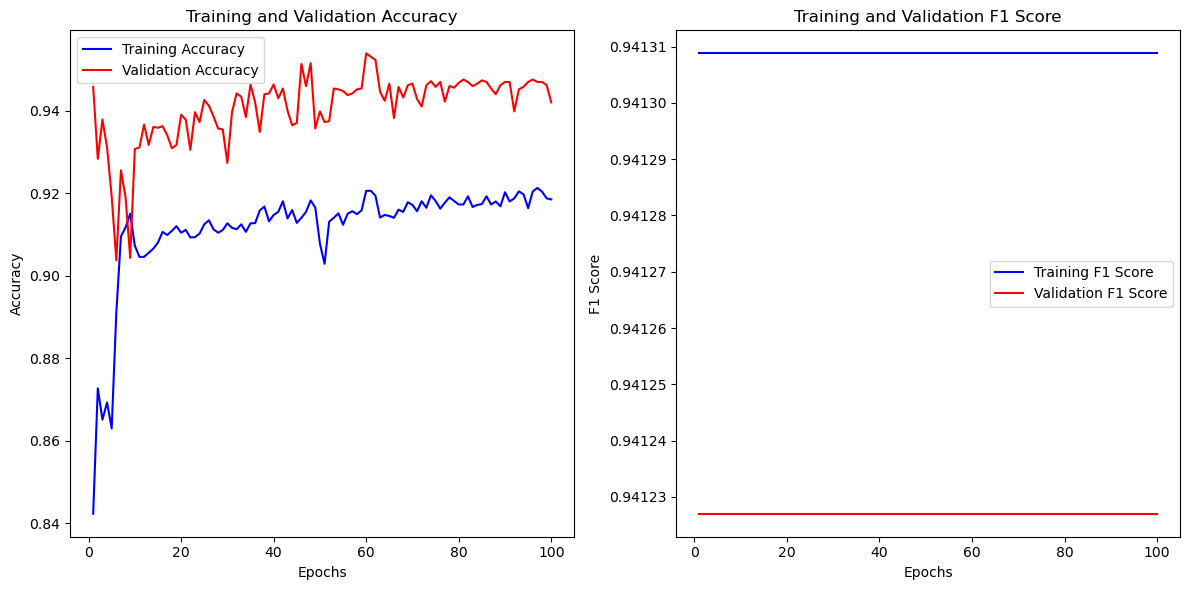

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Extracting training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Initialize empty arrays to store F1 scores
train_f1_scores = []
val_f1_scores = []

# Calculate F1 scores for each epoch
for epoch in range(len(train_accuracy)):
    # Calculate F1 score for training set
    train_pred = np.argmax(model.predict(X_train), axis=1)
    train_true = np.argmax(y_train, axis=1)
    train_f1 = f1_score(train_true, train_pred, average='macro')
    train_f1_scores.append(train_f1)
    
    # Calculate F1 score for validation set
    val_pred = np.argmax(model.predict(X_val), axis=1)
    val_true = np.argmax(y_val, axis=1)
    val_f1 = f1_score(val_true, val_pred, average='macro')
    val_f1_scores.append(val_f1)

# Plotting accuracy and F1 score
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 6))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting F1 score
plt.subplot(1, 2, 2)
plt.plot(epochs, train_f1_scores, 'b', label='Training F1 Score')
plt.plot(epochs, val_f1_scores, 'r', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


SNN

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Determine the number of classes in the dataset
num_classes = len(np.unique(y_train_encoded))

# Convert features to appropriate format for SNN
X_train = np.array(X_train)
y_train = np.array(y_train_encoded)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the SNN model architecture
snn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
snn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the SNN model
snn_history = snn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate and print the training accuracy
snn_train_loss, snn_train_accuracy = snn_model.evaluate(X_train, y_train)
print("SNN Training Accuracy:", snn_train_accuracy)

# Evaluate the SNN model on the test dataset
snn_test_loss, snn_test_accuracy = snn_model.evaluate(X_val, y_val)
print("SNN Test Accuracy:", snn_test_accuracy)

# Save the SNN model
snn_model.save("snn_model.h5")


Epoch 1/100


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7711 - loss: 1131.3241 - val_accuracy: 0.9401 - val_loss: 889.2313
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 639.2095 - val_accuracy: 0.8728 - val_loss: 599.6732
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8381 - loss: 708.4547 - val_accuracy: 0.7998 - val_loss: 295.3727
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8212 - loss: 493.5526 - val_accuracy: 0.9168 - val_loss: 529.4439
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 7285.2852 - val_accuracy: 0.9018 - val_loss: 195.2415
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 301.1971 - val_accuracy: 0.8797 - val_loss: 120.9131
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 271.7480 - val_accuracy: 0.8321 - val_loss: 146.1561
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7968 - loss:

SNN Test Accuracy: 0.9686445593833923


Epoch 1/100


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7604 - loss: 608.9763 - val_accuracy: 0.9363 - val_loss: 580.3140
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 610.6945 - val_accuracy: 0.9421 - val_loss: 172.9037
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8737 - loss: 771.3578 - val_accuracy: 0.9248 - val_loss: 163.3084
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8694 - loss: 386.4271 - val_accuracy: 0.9272 - val_loss: 58.4095
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8390 - loss: 419.2579 - val_accuracy: 0.9012 - val_loss: 73.6296
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8689 - loss: 171.8438 - val_accuracy: 0.8907 - val_loss: 72.6374
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 96.6769 - val_accuracy: 0.8926 - val_loss: 9.5213
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8525 - loss: 52.3462

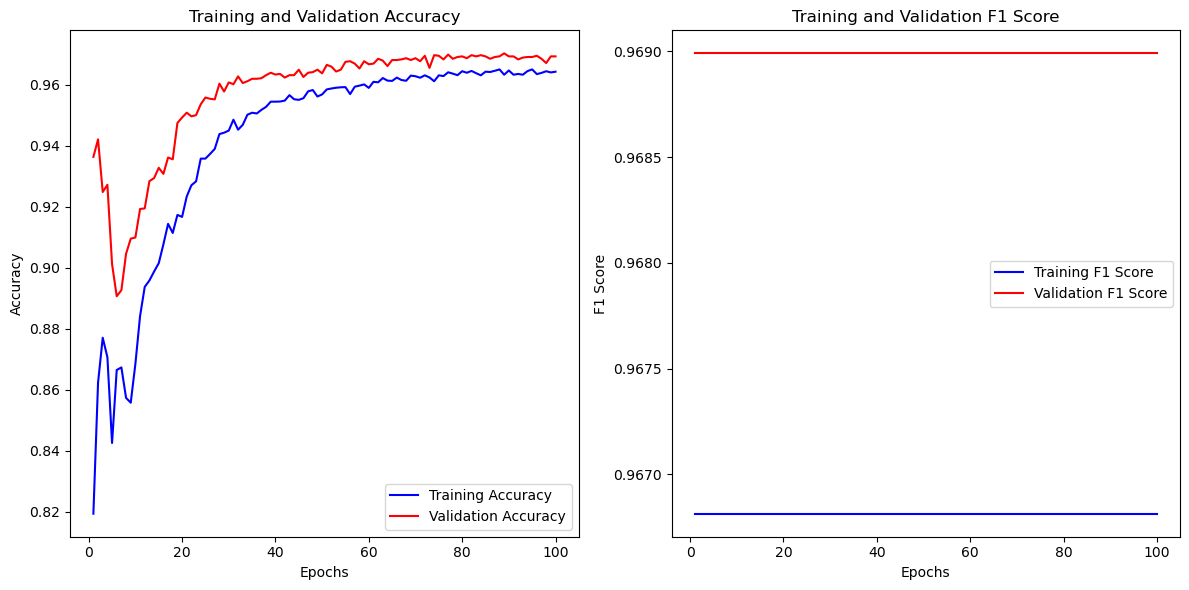

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Determine the number of classes in the dataset
num_classes = len(np.unique(y_train_encoded))

# Convert features to appropriate format for SNN
X_train = np.array(X_train)
y_train = np.array(y_train_encoded)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the SNN model architecture
snn_model = Sequential([
    Flatten(input_shape=(X_train.shape[1],)),  # Flatten the input
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
snn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the SNN model
snn_history = snn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate and print the training accuracy
snn_train_loss, snn_train_accuracy = snn_model.evaluate(X_train, y_train)
print("SNN Training Accuracy:", snn_train_accuracy)

# Evaluate the SNN model on the validation dataset
snn_val_loss, snn_val_accuracy = snn_model.evaluate(X_val, y_val)
print("SNN Validation Accuracy:", snn_val_accuracy)

# Calculate F1 scores for each epoch
train_f1_scores = []
val_f1_scores = []
for epoch in range(len(snn_history.history['accuracy'])):
    train_pred = np.argmax(snn_model.predict(X_train), axis=1)
    val_pred = np.argmax(snn_model.predict(X_val), axis=1)
    train_f1_scores.append(f1_score(y_train, train_pred, average='macro'))
    val_f1_scores.append(f1_score(y_val, val_pred, average='macro'))

# Plotting accuracy and F1 score
epochs = range(1, len(snn_history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, snn_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, snn_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting F1 score
plt.subplot(1, 2, 2)
plt.plot(epochs, train_f1_scores, 'b', label='Training F1 Score')
plt.plot(epochs, val_f1_scores, 'r', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


DNN

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Determine the number of classes in the dataset
num_classes = len(np.unique(y_train))

# Convert features to appropriate format for DNN
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the DNN model architecture
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the DNN model
dnn_history = dnn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate and print the training accuracy
dnn_train_loss, dnn_train_accuracy = dnn_model.evaluate(X_train, y_train)
print("DNN Training Accuracy:", dnn_train_accuracy)

# Evaluate the DNN model on the test dataset
dnn_test_loss, dnn_test_accuracy = dnn_model.evaluate(X_val, y_val)
print("DNN Test Accuracy:", dnn_test_accuracy)

# Save the DNN model
dnn_model.save("dnn_model.h5")


Epoch 1/100


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7594 - loss: 3208.1311 - val_accuracy: 0.9305 - val_loss: 520.8699
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8694 - loss: 1343.6875 - val_accuracy: 0.9246 - val_loss: 75.6476
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 3652.5537 - val_accuracy: 0.9212 - val_loss: 399.0450
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 3843.5203 - val_accuracy: 0.9077 - val_loss: 403.7359
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8783 - loss: 235.2255 - val_accuracy: 0.9123 - val_loss: 82.5385
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8400 - loss: 12852.4150 - val_accuracy: 0.9057 - val_loss: 102.1451
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8263 - loss: 241.2575 - val_accuracy: 0.8430 - val_loss: 44.5790
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8383 - loss

DNN Test Accuracy: 0.9676523208618164


630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step


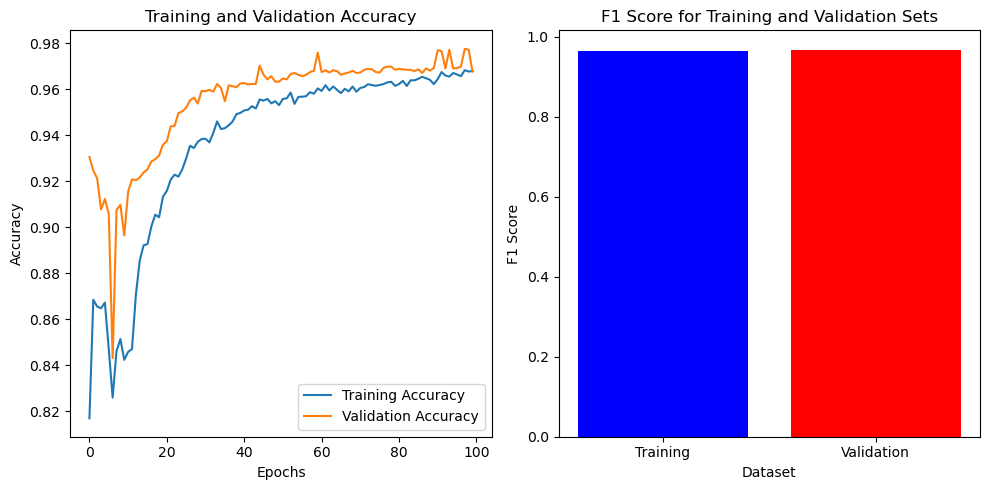

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Predict probabilities for training and validation sets
train_pred_probs = dnn_model.predict(X_train)
val_pred_probs = dnn_model.predict(X_val)

# Convert predicted probabilities to class labels
train_pred = np.argmax(train_pred_probs, axis=1)
val_pred = np.argmax(val_pred_probs, axis=1)

# Calculate F1 scores for training and validation sets
train_f1 = f1_score(y_train, train_pred, average='macro')
val_f1 = f1_score(y_val, val_pred, average='macro')

# Plotting
plt.figure(figsize=(10, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting F1 score
plt.subplot(1, 2, 2)
plt.bar(['Training', 'Validation'], [train_f1, val_f1], color=['blue', 'red'])
plt.xlabel('Dataset')
plt.ylabel('F1 Score')
plt.title('F1 Score for Training and Validation Sets')

plt.tight_layout()
plt.show()


FNN

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Determine the number of classes in the dataset
num_classes = len(np.unique(y_train))

# Convert features to appropriate format for FNN
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the FNN model architecture
fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the FNN model
fnn_history = fnn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate and print the training accuracy
fnn_train_loss, fnn_train_accuracy = fnn_model.evaluate(X_train, y_train)
print("FNN Training Accuracy:", fnn_train_accuracy)

# Evaluate the FNN model on the test dataset
fnn_test_loss, fnn_test_accuracy = fnn_model.evaluate(X_val, y_val)
print("FNN Test Accuracy:", fnn_test_accuracy)

# Save the FNN model
fnn_model.save("fnn_model.h5")


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7743 - loss: 672.0599 - val_accuracy: 0.9486 - val_loss: 249.9848
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8613 - loss: 352.6977 - val_accuracy: 0.9428 - val_loss: 138.4045
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 1799.4194 - val_accuracy: 0.9266 - val_loss: 266.2459
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 173.1647 - val_accuracy: 0.9184 - val_loss: 73.1524
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 201.6206 - val_accuracy: 0.9325 - val_loss: 138.4491
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8734 - loss: 424.0320 - val_accuracy: 0.9143 - val_loss: 90.1036
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 101.7266 - val_accuracy: 0.9101 - val_loss: 5.0881
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8392 

FNN Test Accuracy: 0.969438374042511


Epoch 1/100


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7758 - loss: 2808.9919 - val_accuracy: 0.9202 - val_loss: 208.7961
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8486 - loss: 1150.0702 - val_accuracy: 0.9387 - val_loss: 347.1437
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 227.6951 - val_accuracy: 0.5527 - val_loss: 255.7716
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 489.3370 - val_accuracy: 0.9371 - val_loss: 57.9697
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 171.1987 - val_accuracy: 0.9311 - val_loss: 24.6886
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 207.5314 - val_accuracy: 0.9153 - val_loss: 40.8747
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8642 - loss: 84.5061 - val_accuracy: 0.9155 - val_loss: 11.5866
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 106.

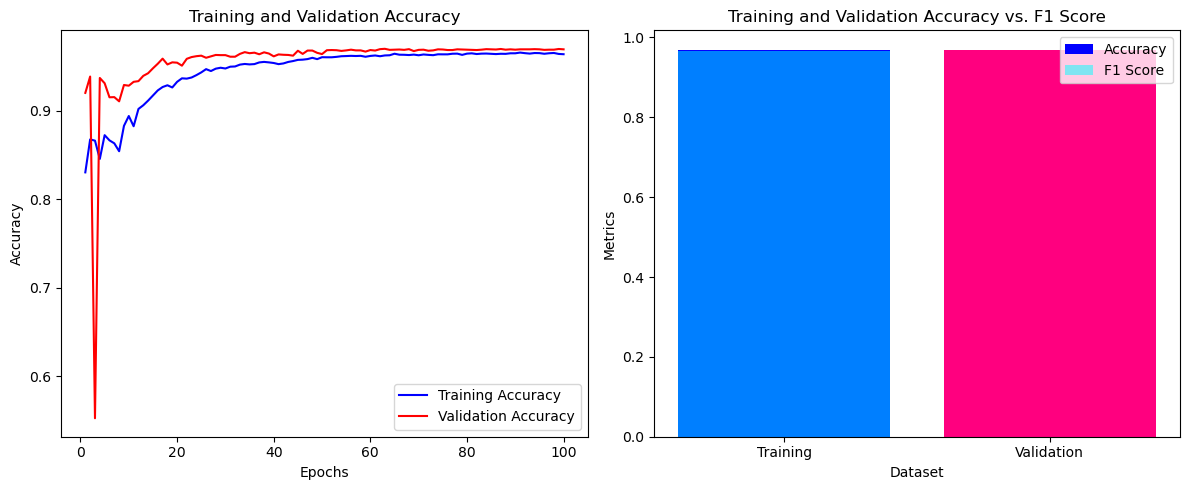

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Determine the number of classes in the dataset
num_classes = len(np.unique(y_train))

# Convert features to appropriate format for FNN
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the FNN model architecture
fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the FNN model
fnn_history = fnn_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model
fnn_train_loss, fnn_train_accuracy = fnn_model.evaluate(X_train, y_train)
fnn_test_loss, fnn_test_accuracy = fnn_model.evaluate(X_val, y_val)

# Predict classes
train_pred = np.argmax(fnn_model.predict(X_train), axis=1)
val_pred = np.argmax(fnn_model.predict(X_val), axis=1)

# Calculate F1 score
train_f1 = f1_score(y_train, train_pred, average='macro')
val_f1 = f1_score(y_val, val_pred, average='macro')

# Plotting
epochs = range(1, len(fnn_history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, fnn_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, fnn_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting F1 score
plt.subplot(1, 2, 2)
plt.bar(['Training', 'Validation'], [fnn_train_accuracy, fnn_test_accuracy], color=['blue', 'red'], label='Accuracy')
plt.bar(['Training', 'Validation'], [train_f1, val_f1], color=['cyan', 'magenta'], alpha=0.5, label='F1 Score')
plt.title('Training and Validation Accuracy vs. F1 Score')
plt.xlabel('Dataset')
plt.ylabel('Metrics')
plt.legend()

plt.tight_layout()
plt.show()


LSTM

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Determine the number of classes in the dataset
num_classes = len(np.unique(y_train))

# Convert features to appropriate format for LSTM
X_train = np.array(X_train)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for LSTM
y_train = np.array(y_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the LSTM model architecture
lstm_model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate and print the training accuracy
lstm_train_loss, lstm_train_accuracy = lstm_model.evaluate(X_train, y_train)
print("LSTM Training Accuracy:", lstm_train_accuracy)

# Evaluate the LSTM model on the validation dataset
lstm_val_loss, lstm_val_accuracy = lstm_model.evaluate(X_val, y_val)
print("LSTM Validation Accuracy:", lstm_val_accuracy)

# Save the LSTM model
lstm_model.save("lstm_model.h5")


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8802 - loss: 0.2715 - val_accuracy: 0.9649 - val_loss: 0.0987
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1275 - val_accuracy: 0.9645 - val_loss: 0.0940
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.1213 - val_accuracy: 0.9724 - val_loss: 0.0839
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9603 - loss: 0.1111 - val_accuracy: 0.9633 - val_loss: 0.0834
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9586 - loss: 0.1132 - val_accuracy: 0.9659 - val_loss: 0.0810
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1044 - val_accuracy: 0.9665 - val_loss: 0.0846
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1070 - val_accuracy: 0.9649 - val_loss: 0.0783
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9624 - loss: 0.0981 - val_accu

LSTM Validation Accuracy: 0.9835284948348999


Epoch 1/100


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8854 - loss: 0.2604 - val_accuracy: 0.9619 - val_loss: 0.0909
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9541 - loss: 0.1216 - val_accuracy: 0.9649 - val_loss: 0.0908
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.1083 - val_accuracy: 0.9679 - val_loss: 0.0790
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9581 - loss: 0.1053 - val_accuracy: 0.9714 - val_loss: 0.0797
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.0978 - val_accuracy: 0.9700 - val_loss: 0.0740
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1022 - val_accuracy: 0.9686 - val_loss: 0.0789
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9614 - loss: 0.0996 - val_accuracy: 0.9712 - val_loss: 0.0708
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.0924 - val_accuracy: 0.9724

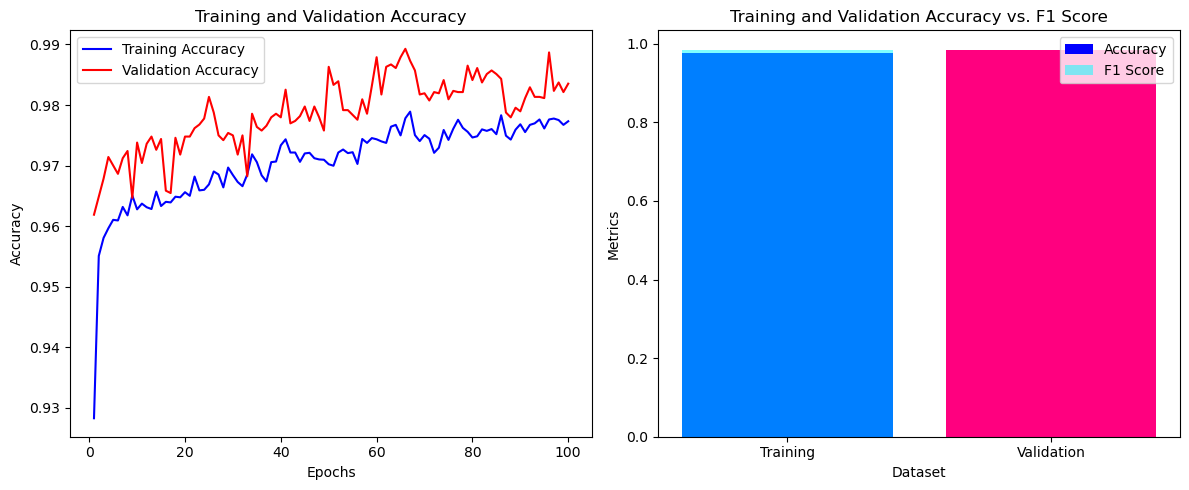

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the dataset
train_data = train_df.copy()

# Preprocessing
X_train = train_data.drop(columns=['class'])  # Features
y_train = train_data['class']  # Labels

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Determine the number of classes in the dataset
num_classes = len(np.unique(y_train))

# Convert features to appropriate format for LSTM
X_train = np.array(X_train)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for LSTM
y_train = np.array(y_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the LSTM model architecture
lstm_model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Predict classes
train_pred = np.argmax(lstm_model.predict(X_train), axis=1)
val_pred = np.argmax(lstm_model.predict(X_val), axis=1)

# Calculate F1 score
train_f1 = f1_score(y_train, train_pred, average='macro')
val_f1 = f1_score(y_val, val_pred, average='macro')

# Plotting
epochs = range(1, len(lstm_history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, lstm_history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(epochs, lstm_history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting F1 score
plt.subplot(1, 2, 2)
plt.bar(['Training', 'Validation'], [lstm_history.history['accuracy'][-1], lstm_history.history['val_accuracy'][-1]], color=['blue', 'red'], label='Accuracy')
plt.bar(['Training', 'Validation'], [train_f1, val_f1], color=['cyan', 'magenta'], alpha=0.5, label='F1 Score')
plt.title('Training and Validation Accuracy vs. F1 Score')
plt.xlabel('Dataset')
plt.ylabel('Metrics')
plt.legend()

plt.tight_layout()
plt.show()


ENSEMBLE MODEL

In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training and testing datasets
train_data = pd.read_csv(r"C:\Users\mamid\Downloads\Train_data.csv")
test_data = pd.read_csv(r"C:\Users\mamid\Downloads\Test_data.csv")

# Handle missing values if any
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

# Check if 'class' column exists in training data
if 'class' in train_data.columns:
    # Remove 'class' column from training data
    X_train = train_data.drop("class", axis=1)
    y_train = train_data["class"]
else:
    X_train = train_data

# Check if 'class' column exists in testing data
if 'class' in test_data.columns:
    # Remove 'class' column from testing data
    X_test = test_data.drop("class", axis=1)
    y_test = test_data["class"]  # Define y_test
else:
    X_test = test_data
    # Define a placeholder y_test since we don't have true labels for prediction
    y_test = np.zeros(len(X_test))  # Create a placeholder array with zeros

# Encode categorical variables
label_encoders = {}
for column in X_train.select_dtypes(include=["object"]).columns:
    label_encoders[column] = LabelEncoder()
    combined_data = pd.concat([X_train[column], X_test[column]], axis=0)
    label_encoders[column].fit(combined_data)
    X_train[column] = label_encoders[column].transform(X_train[column])
    X_test[column] = label_encoders[column].transform(X_test[column])

# Scale numerical features
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=["int64", "float64"]).columns] = scaler.fit_transform(
    X_train[X_train.select_dtypes(include=["int64", "float64"]).columns]
)
X_test[X_test.select_dtypes(include=["int64", "float64"]).columns] = scaler.transform(
    X_test[X_test.select_dtypes(include=["int64", "float64"]).columns]
)

# Define the models
cnn_model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

snn_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Load pre-trained models if available

# Combine outputs of each model
cnn_preds = cnn_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
snn_preds = snn_model.predict(X_test)
dnn_preds = dnn_model.predict(X_test)
fnn_preds = fnn_model.predict(X_test)
lstm_preds = lstm_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))

# Weighted averaging of predictions
weighted_preds = (0.3 * cnn_preds + 0.2 * snn_preds + 0.2 * dnn_preds + 0.2 * fnn_preds + 0.1 * lstm_preds)

# Assuming you have true labels y_test and predictions ensemble_pred
ensemble_pred = np.round(np.mean(weighted_preds, axis=1)).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of the final ensemble model:", accuracy)


c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mamid\anaconda3\condajupyter\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step
Accuracy of the final ensemble model: 0.972764371894961


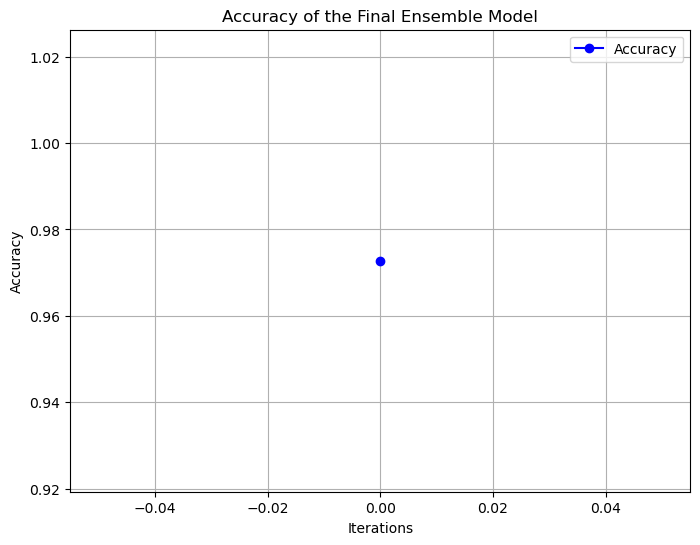

In [158]:
# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Accuracy', color='blue', marker='o')
plt.title('Accuracy of the Final Ensemble Model')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
